In [1]:
from time import time
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.decomposition import RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier


In [2]:
X_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_train.npy')
X_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_test.npy')
y_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_train.npy')
y_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_test.npy')


In [3]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [4]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
print (len(y_test))

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)
10000


In [7]:
    #num=len(y_test)
    num=500
    a = datetime.datetime.now()   
    clf = KNeighborsClassifier(n_neighbors=4)

    #training knn
    clf = clf.fit(x_train, y_train)
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Training in Seconds ",c.seconds)

    #predicting
    a = datetime.datetime.now()      
    y_pred = clf.predict(x_test[:num])
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Predicting in Seconds ",c.seconds)

    #checking the predicted labels against the original labels and printing output
    r=0
    w=0
    for i in range(num):
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
    print ("tested ", num, " images")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")

Time required for Training in Seconds  18
Time required for Predicting in Seconds  130
tested  500  digits
correct:  160 wrong:  340 error rate:  68.0 %
got correctly  32.0 %


Applying DR-PCA

In [6]:
n_components = 40

In [7]:
PCADRobject = RandomizedPCA(n_components=n_components).fit(x_train)


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
dr_train = PCADRobject.transform(x_train)

In [9]:
dr_test = PCADRobject.transform(x_test)

In [10]:
print (dr_train.shape)
print (dr_test.shape)
print (y_train.shape)

(50000, 40)
(10000, 40)
(50000,)


In [11]:
clf = KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(dr_train, np.ravel(y_train))

In [12]:
y_pred = clf.predict(dr_test)

In [13]:
y_pred

array([4, 8, 8, ..., 5, 6, 2])

In [14]:
np.ravel(y_test)

array([3, 8, 8, ..., 5, 1, 7])

In [15]:
    num_test = len(x_test)
    #checking the result and printing output
    r=0
    w=0
    y_test = np.ravel(y_test)
    for i in range(num_test):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
    print ("tested ", num_test, " digits")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")

tested  10000  digits
correct:  3895 wrong:  6105 error rate:  61.05 %
got correctly  38.95 %


Run it in a loop to check optimal no of components


In [7]:
n_components = [20,40,80,160,320,640,1280,2560]
for n_components in n_components:
    PCADRobject = RandomizedPCA(n_components=n_components).fit(x_train)
    dr_train = PCADRobject.transform(x_train)
    dr_test = PCADRobject.transform(x_test)
    print (dr_train.shape)
    print (dr_test.shape)
    clf = KNeighborsClassifier(n_neighbors=4)
    clf = clf.fit(dr_train, np.ravel(y_train))
    y_pred = clf.predict(dr_test)
    
    num_test = len(x_test)
    #checking the result and printing output
    r=0
    w=0
    y_test = np.ravel(y_test)
    for i in range(num_test):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
    print ('FOR N_COMPONENTS...',n_components)
    print ("tested ", num_test, " digits")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 20)
(10000, 20)
FOR N_COMPONENTS... 20
tested  10000  digits
correct:  3766 wrong:  6234 error rate:  62.34 %
got correctly  37.66 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 40)
(10000, 40)
FOR N_COMPONENTS... 40
tested  10000  digits
correct:  3872 wrong:  6128 error rate:  61.28 %
got correctly  38.72 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 80)
(10000, 80)
FOR N_COMPONENTS... 80
tested  10000  digits
correct:  3763 wrong:  6237 error rate:  62.37 %
got correctly  37.63 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 160)
(10000, 160)
FOR N_COMPONENTS... 160
tested  10000  digits
correct:  3622 wrong:  6378 error rate:  63.78 %
got correctly  36.22 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 320)
(10000, 320)
FOR N_COMPONENTS... 320
tested  10000  digits
correct:  3518 wrong:  6482 error rate:  64.82 %
got correctly  35.18 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 640)
(10000, 640)
FOR N_COMPONENTS... 640
tested  10000  digits
correct:  3422 wrong:  6578 error rate:  65.78 %
got correctly  34.22 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 1280)
(10000, 1280)
FOR N_COMPONENTS... 1280
tested  10000  digits
correct:  3401 wrong:  6599 error rate:  65.99 %
got correctly  34.01 %


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(50000, 2560)
(10000, 2560)
FOR N_COMPONENTS... 2560
tested  10000  digits
correct:  3400 wrong:  6600 error rate:  66.0 %
got correctly  34.0 %


In [19]:
PCADRobject = RandomizedPCA(n_components=2).fit(x_train)
dr_train = PCADRobject.transform(x_train)
dr_test = PCADRobject.transform(x_test)

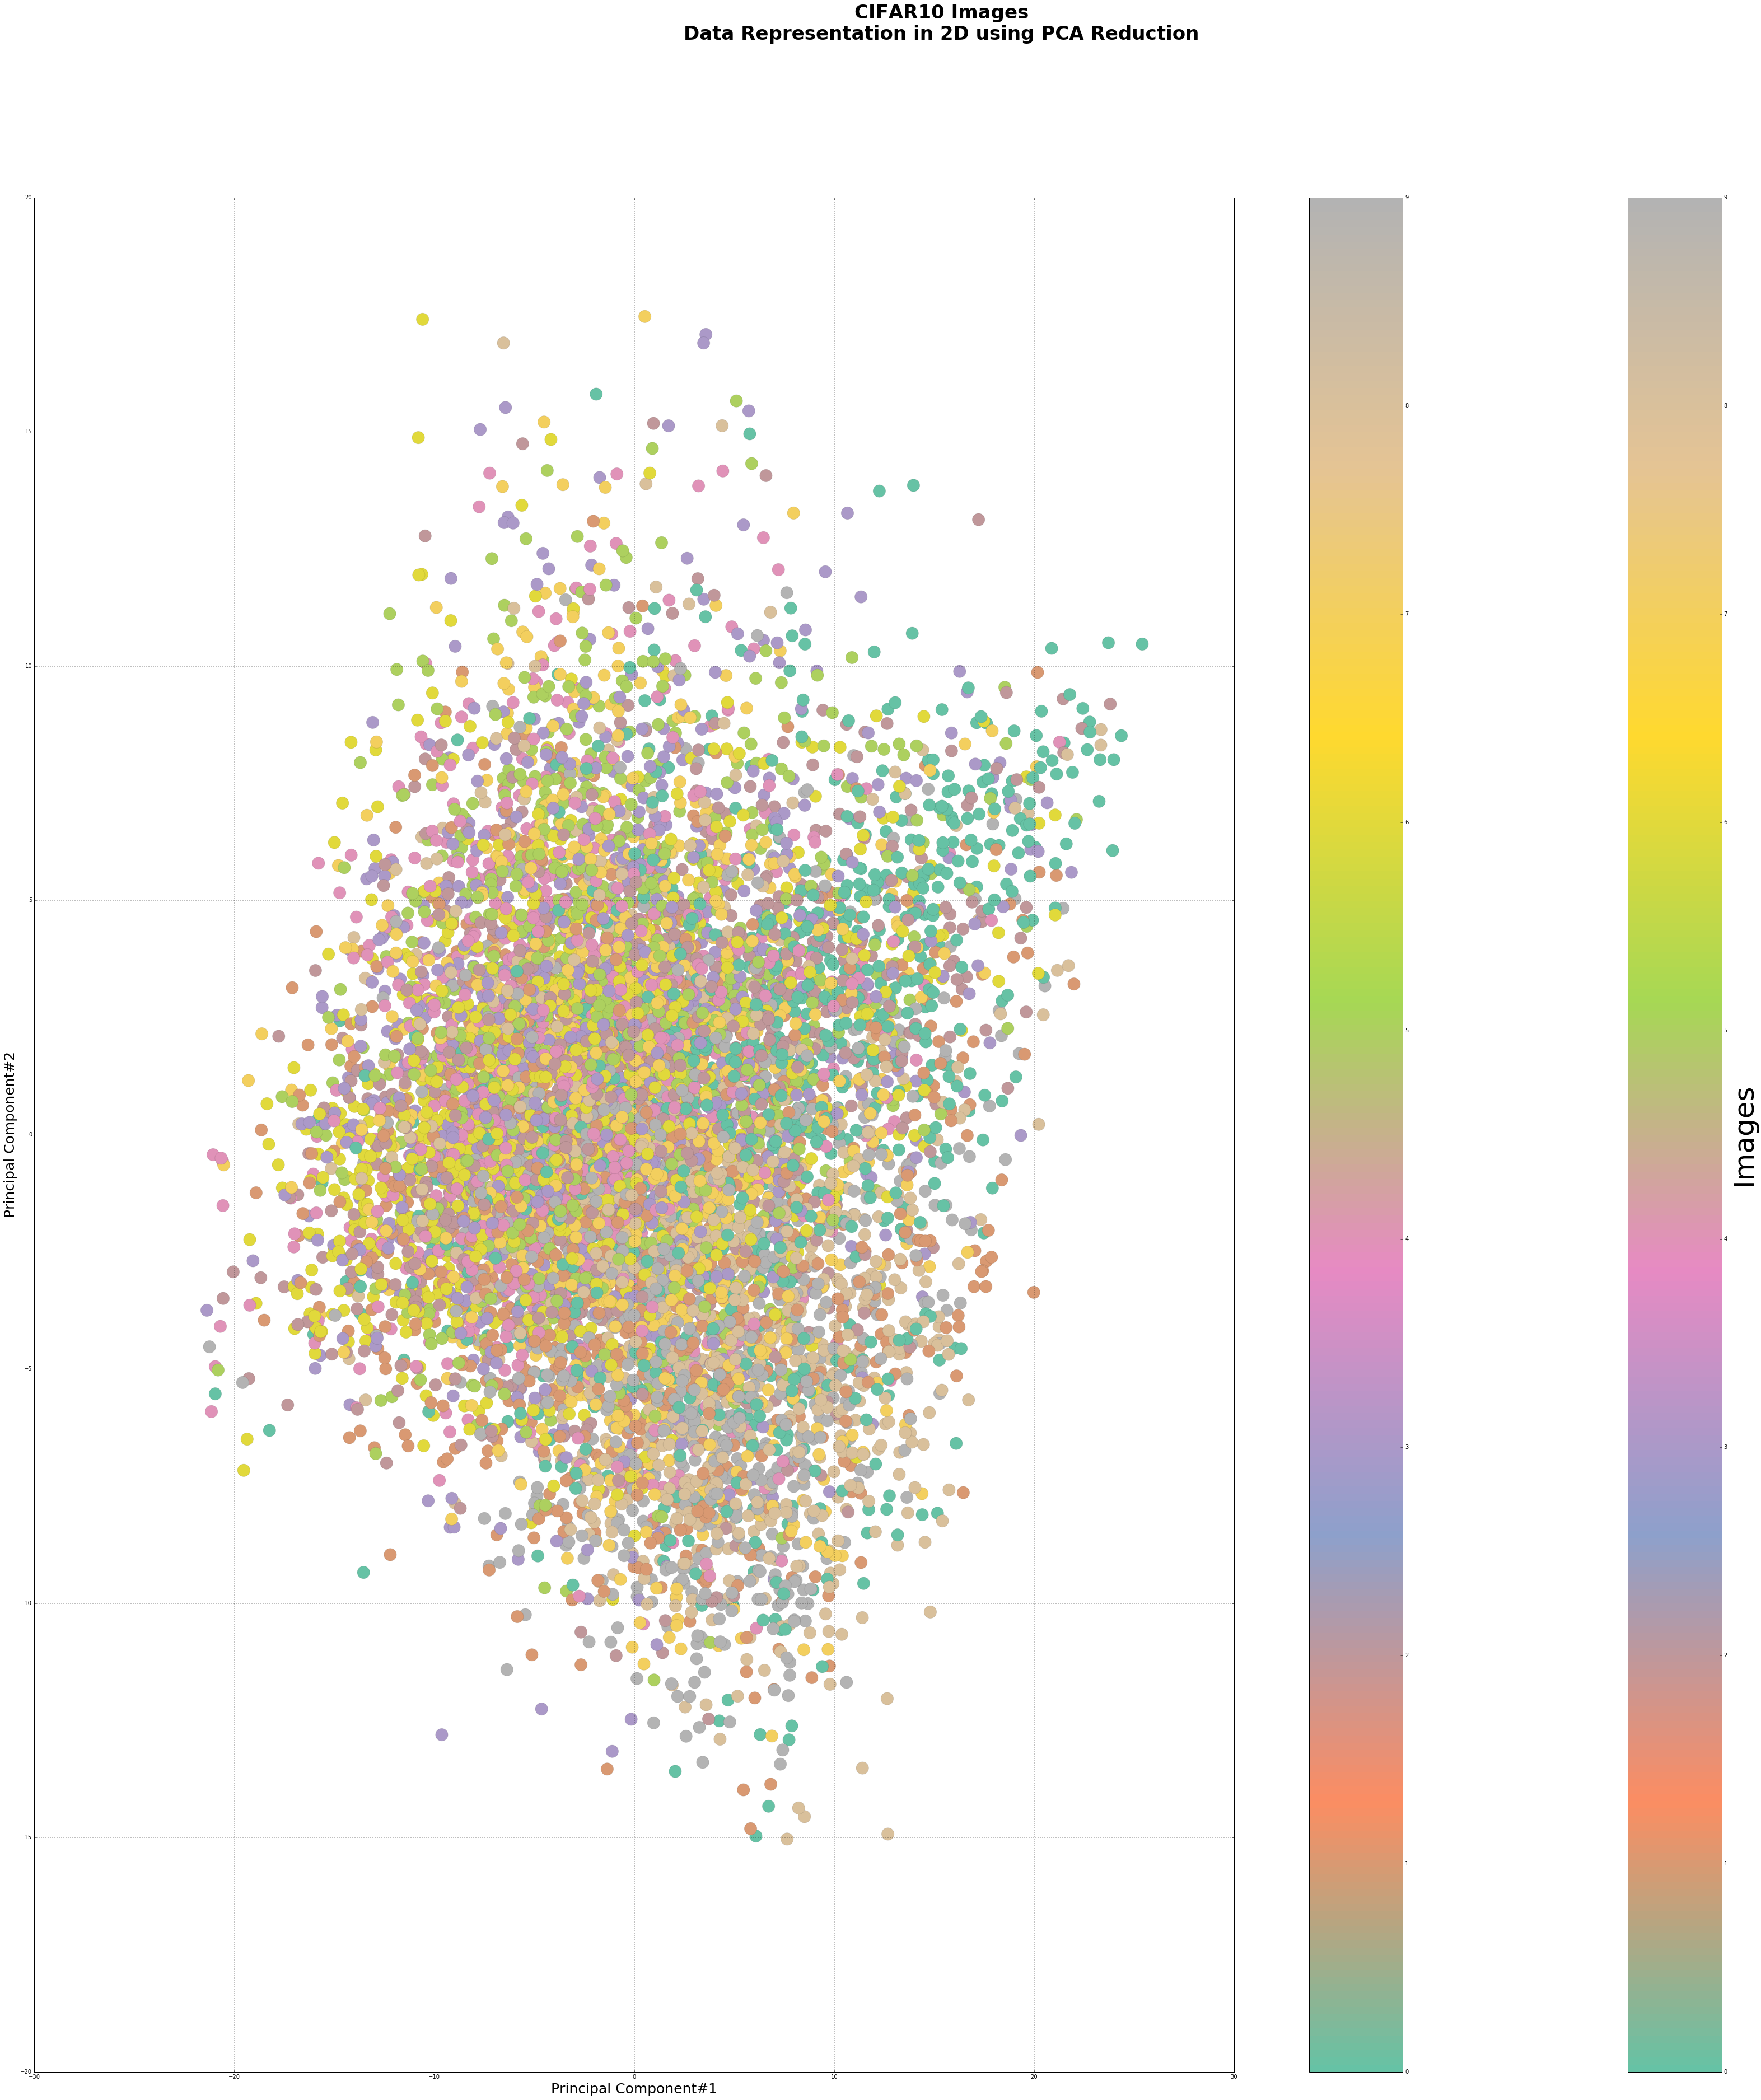

In [20]:
fig=plt.figure(figsize=(60,60))
cm = plt.cm.get_cmap('Set2')
#'Accent', 'Dark2', 'Paired', 'Pastel1','Pastel2', 'Set1', 'Set2', 'Set3'
#cm = plt.cm.Set3(np.linspace(0, 1, 10))
ax = fig.add_subplot(111)
fig.suptitle('CIFAR10 Images\nData Representation in 2D using PCA Reduction',fontsize=34, fontweight='bold')

plt.xlabel('Principal Component#1', fontsize=25)
plt.ylabel('Principal Component#2', fontsize=25)

sc=plt.scatter(dr_test[:,0],dr_test[:,1],c=y_test,s=500,vmin=0, vmax=9,cmap=cm,alpha=1.1)

cbar = fig.colorbar(sc)
cbar.set_label('Images',size=50)

#for label, x, y in zip(test_results, dr_test[:,0], dr_test[:,1]):
#    ax.annotate(label,xy=(x,y),textcoords='data', size=25)
#ax.legend()
plt.colorbar(sc)
plt.grid()
plt.show()



In [ ]:
df = pd.DataFrame({'PC#1':dr_test[:,0],'PC#2':dr_test[:,1],'ActualLabel':y_test})

In [ ]:
from bokeh.charts import Scatter, output_file, show
scatter = Scatter(df, x='PC#1', y='PC#2',
                  color='ActualLabel', marker='ActualLabel',
                  title='PCA 2d MNIST',
                  legend=True)

output_file("BOKEHofPCA2dMNIST.html", title="PCA 2d MNIST")

show(scatter)